In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

One value per config

In [16]:
savepath = "../comparison_results_8.csv"

df_results = pd.read_csv(savepath)

In [18]:
df_test = df_results[df_results["variant"]=="UrnGenerativeModel"]

In [36]:
df_results.columns

Index(['variant', 'config', 'version', 'Logp', 'MSE', 'T', 'rho_t', 'alpha_t',
       'gamma_t'],
      dtype='object')

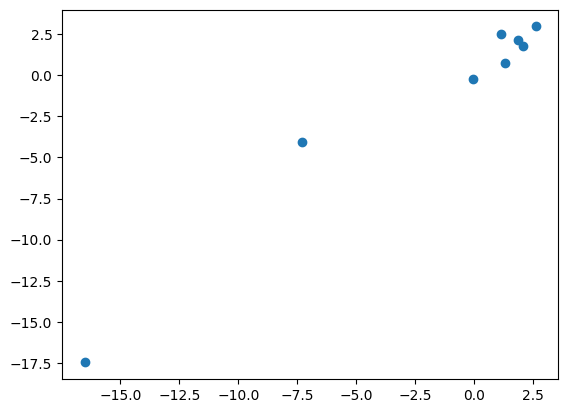

In [26]:
plt.scatter(df_test[df_test['version']=='python']['Logp'],df_test[df_test['version']=='matlab']['Logp'])

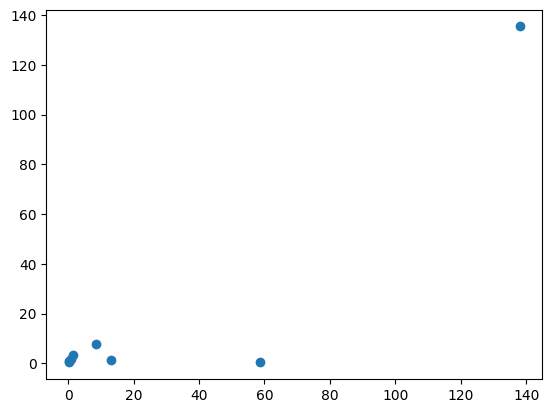

In [27]:
plt.scatter(df_test[df_test['version']=='python']['MSE'],df_test[df_test['version']=='matlab']['MSE'])

<Axes: xlabel='config', ylabel='Logp'>

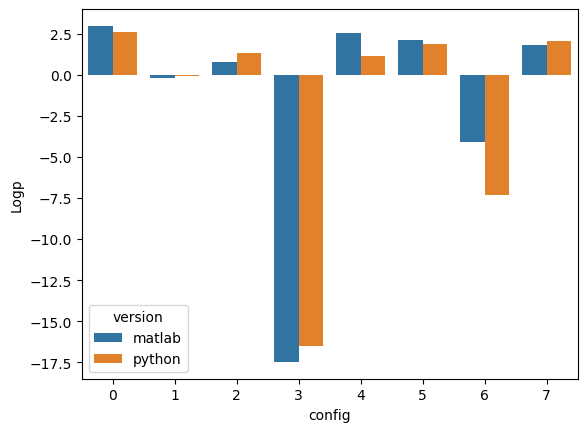

In [30]:
sns.barplot(data=df_test, x='config', y='Logp', hue='version')

<Axes: xlabel='config', ylabel='MSE'>

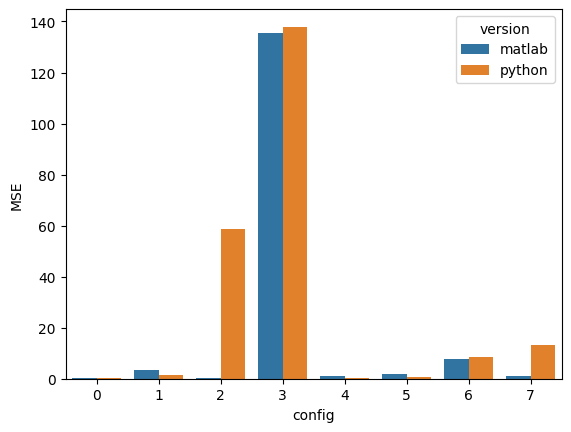

In [31]:
sns.barplot(data=df_test, x='config', y='MSE', hue='version')

<Axes: ylabel='T'>

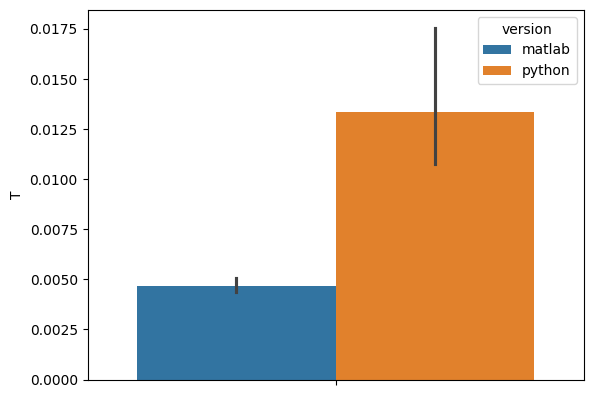

In [33]:
sns.barplot(data=df_test, y='T', hue='version')

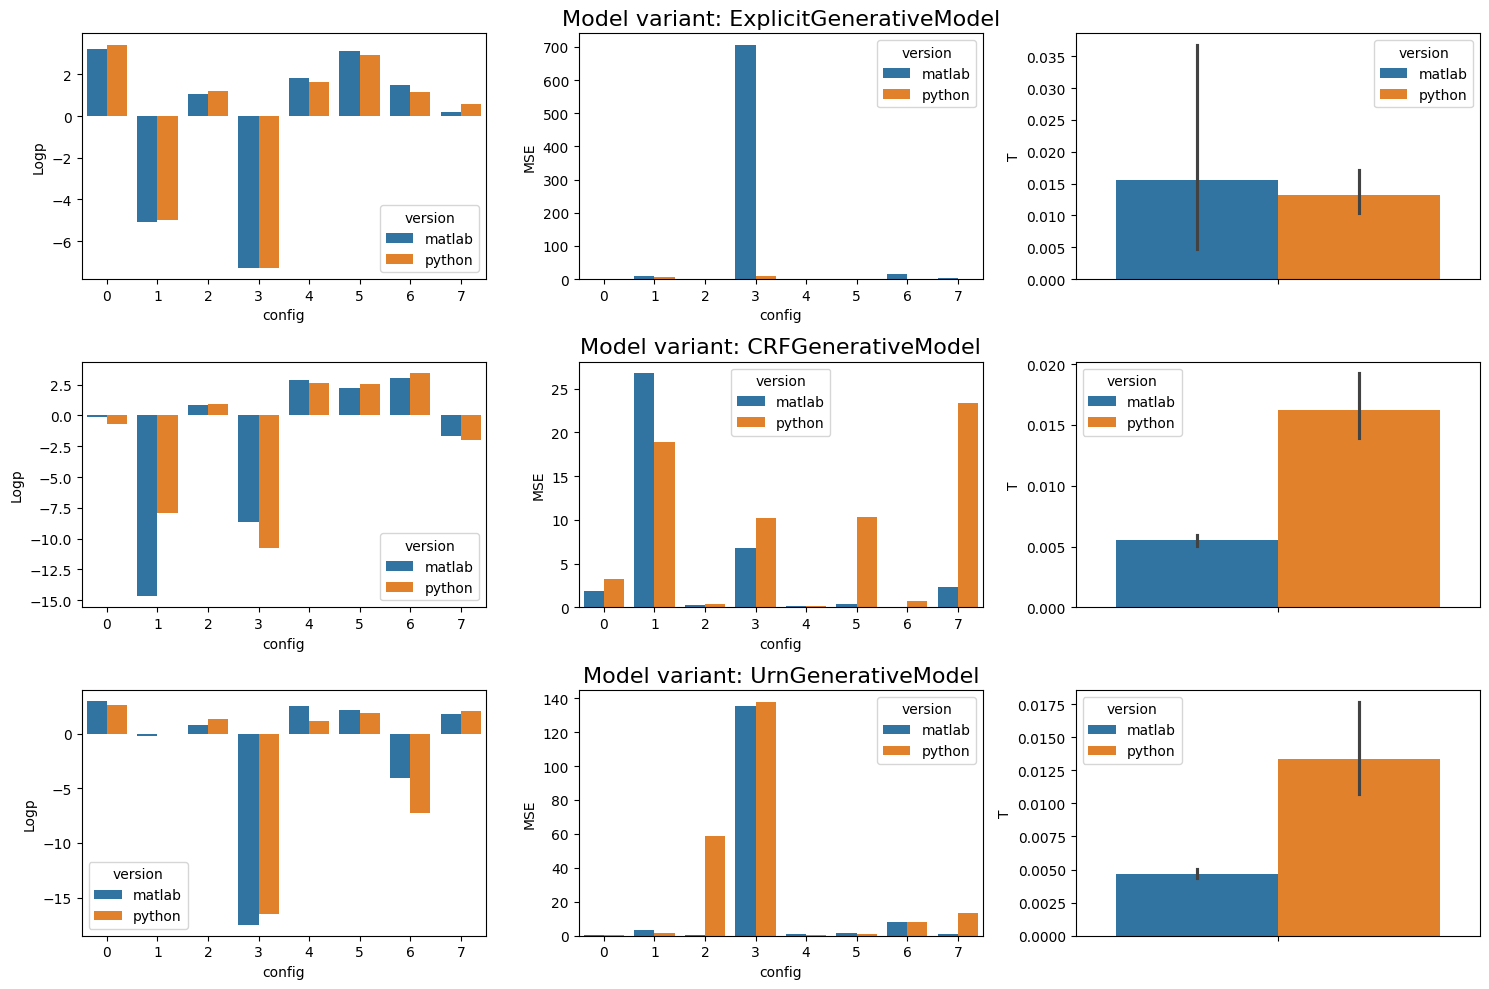

In [35]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for i, variant in enumerate(df_results["variant"].unique()):
    df_var = df_results[df_results["variant"] == variant]
    
    # Plot the barplots in the respective axes
    sns.barplot(data=df_var, x='config', y='Logp', hue='version', ax=axes[i, 0])
    sns.barplot(data=df_var, x='config', y='MSE', hue='version', ax=axes[i, 1])
    sns.barplot(data=df_var, y='T', hue='version', ax=axes[i, 2])
    
    # Set the title for each row (variant)
    axes[i, 1].set_title(f"Model variant: {variant}", fontsize=16)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

Logp and MSE as distributions per config

In [43]:
savepath = "../comparison_results_27.csv"
df_results = pd.read_csv(savepath)

In [46]:
df_results.version.unique()

array(['matlab', 'python'], dtype=object)

<Axes: xlabel='config', ylabel='Logp'>

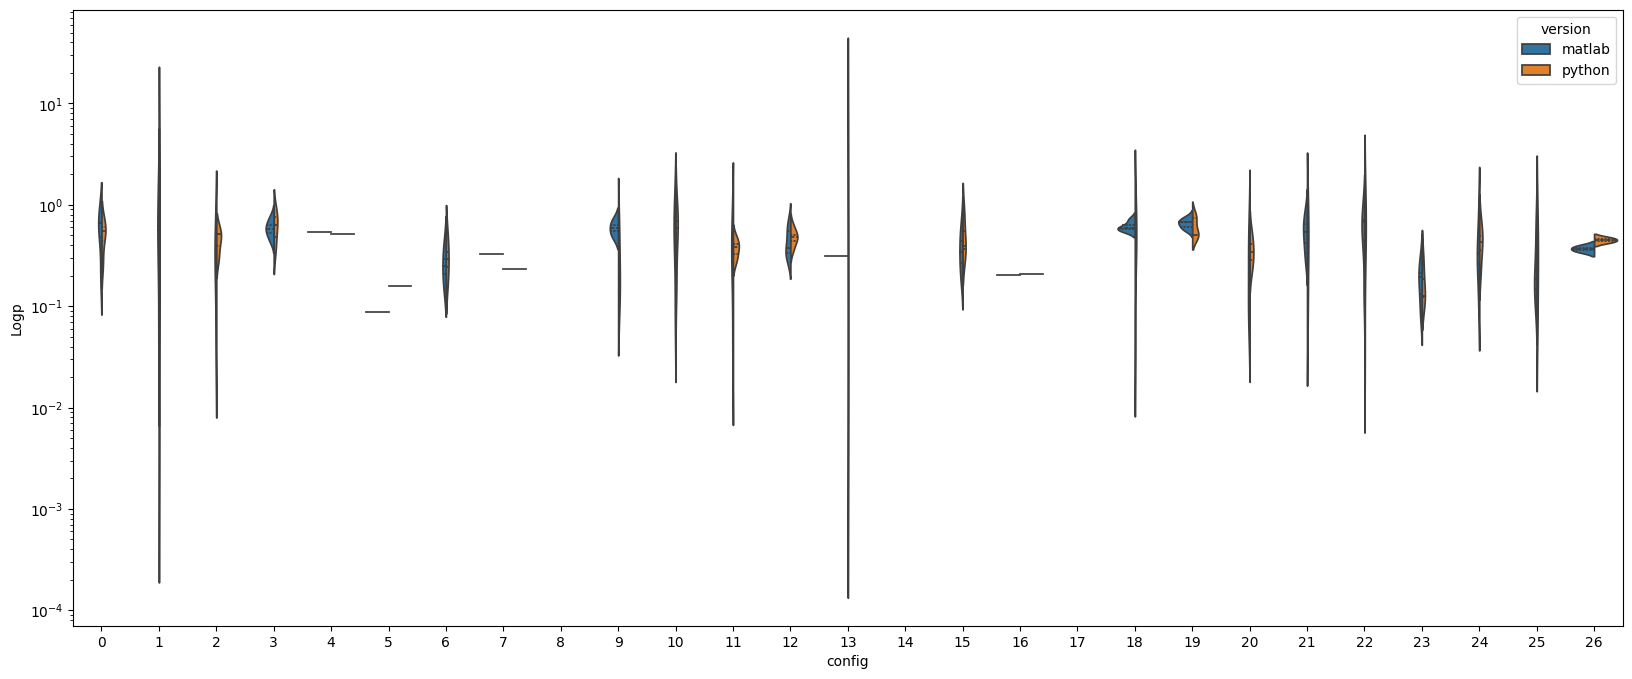

In [50]:
# Plot the barplots in the respective axes
plt.figure(figsize=(20, 8))
sns.violinplot(data=df_results, x='config', y='Logp', hue='version', log_scale=True, split=True, inner="quart")
# sns.violinplot(data=df_var, x='config', y='MSE', hue='version')
# sns.violinplot(data=df_var, y='T', hue='version')

In [51]:
df_results[['config', 'alpha_t', 'gamma_t', 'rho_t']].drop_duplicates()

,config,alpha_t,gamma_t,rho_t
0,0,0.1,0.1,0.1
10,1,0.1,1.0,0.1
20,2,0.1,10.0,0.1
30,3,1.0,0.1,0.1
40,4,1.0,1.0,0.1
50,5,1.0,10.0,0.1
60,6,10.0,0.1,0.1
70,7,10.0,1.0,0.1
80,8,10.0,10.0,0.1
90,9,0.1,0.1,0.5


<Axes: xlabel='config', ylabel='Logp'>

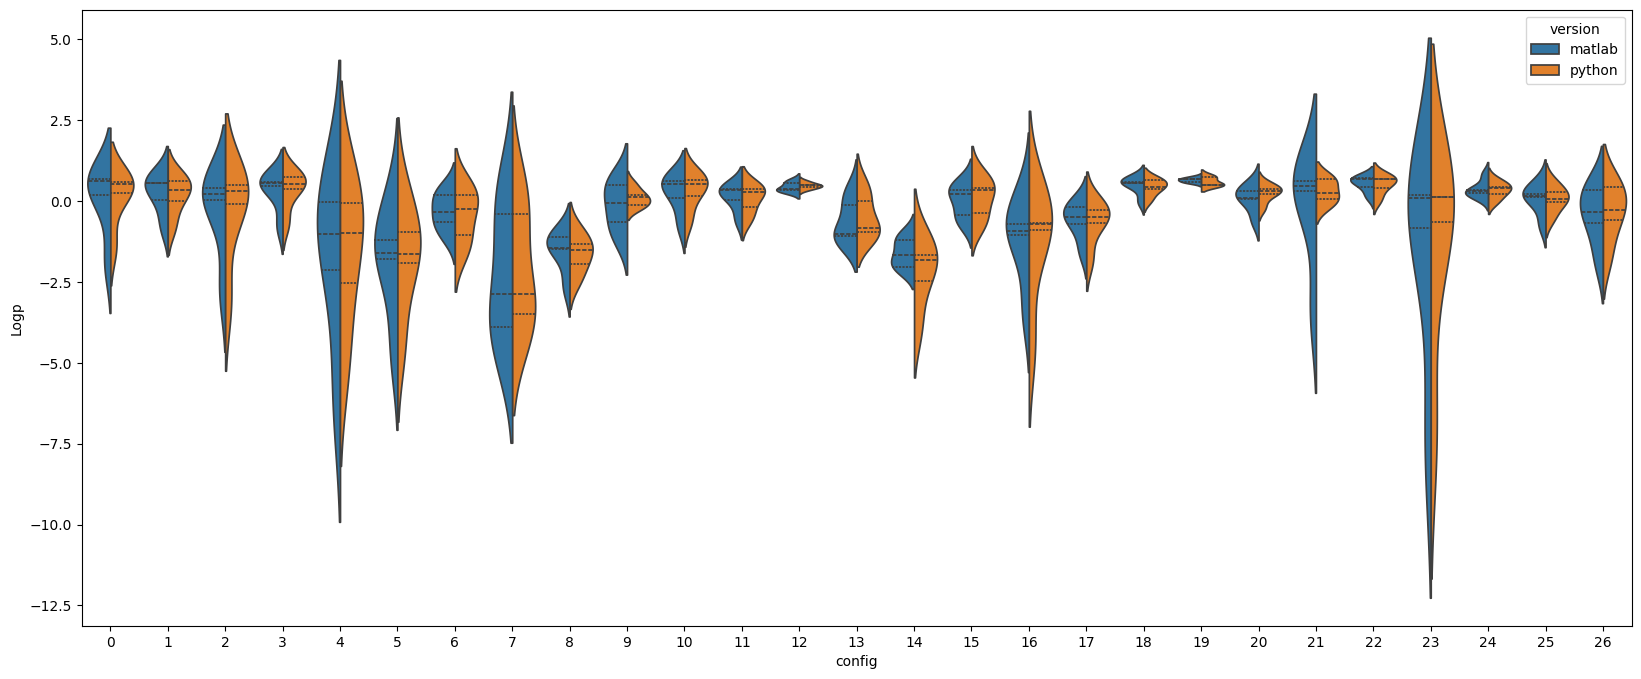

In [ ]:
# Exclude config 1 and 13

df_results['config'] = df_results['config'].apply(lambda x: str(x))
plt.figure(figsize=(20, 8))
sns.violinplot(data=df_results, x='config', y='Logp', hue='version', split=True, inner="quart", density_norm='count')

<Axes: xlabel='config', ylabel='MSE'>

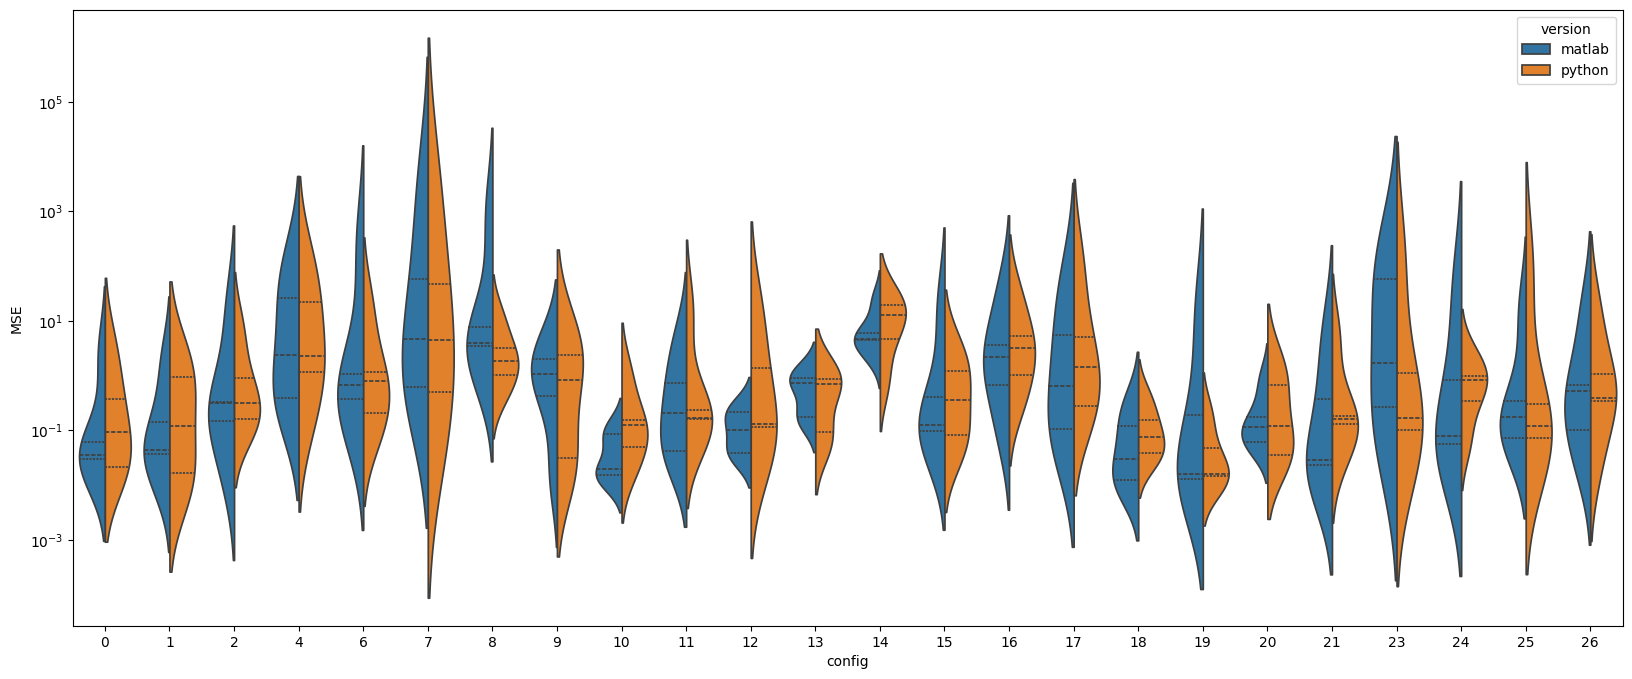

In [92]:
plt.figure(figsize=(20, 8))
sns.violinplot(data=df_results[~df_results['config'].isin(['3', '5', '22'])], x='config', y='MSE', hue='version', split=True, inner="quart", density_norm='count', log_scale=True)

<Axes: xlabel='version', ylabel='T'>

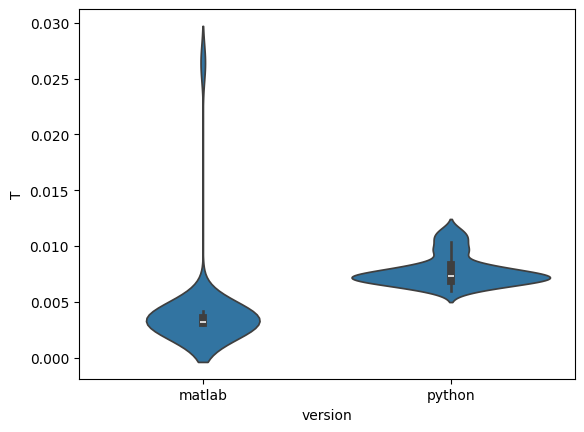

In [93]:
sns.violinplot(data=df_results, x='version', y='T')